## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the datasets

In [2]:
train = pd.read_csv('loan_train.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
test = pd.read_csv('loan_test.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


## Handling the missing data

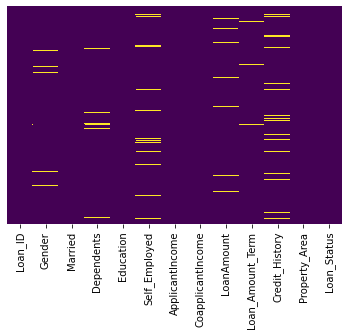

In [4]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

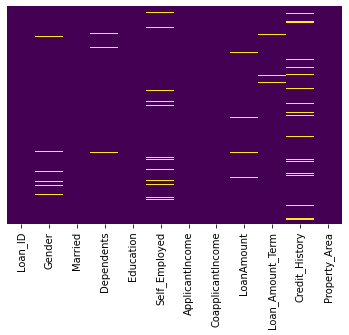

In [5]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
train.shape

(614, 13)

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [9]:
test.shape

(367, 12)

In [10]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

Here, in the 'train' dataset, the missing LoanAmount is replaced by the mean value of that column. In both the 'train' & 'test' dataset, the missing values are replaced by the median, as there is only two types of values, 0 & 1.

In [12]:
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mean())
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].median())

test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].median())

Dropping all the remaining null values

In [13]:
train.dropna(inplace=True)
test.dropna(inplace=True)

In [14]:
train.shape

(542, 13)

In [15]:
test.shape

(314, 12)

In [16]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [18]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


## Handling the categorical data

In [ ]:
plt.figure(figsize=(100, 50))
sns.set(font_scale=5)

plt.subplot(331)
sns.countplot(train['Gender'], hue=train['Loan_Status'])

plt.subplot(332)
sns.countplot(train['Married'], hue=train['Loan_Status'])

plt.subplot(333)
sns.countplot(train['Education'], hue=train['Loan_Status'])

plt.subplot(334)
sns.countplot(train['Self_Employed'], hue=train['Loan_Status'])

plt.subplot(335)
sns.countplot(train['Property_Area'], hue=train['Loan_Status'])

In [20]:
l = list(train['Dependents'].value_counts().index)
l

['0', '1', '2', '3+']

In [21]:
train['Loan_Status'].replace('Y', 1, inplace=True)
train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].value_counts()

1    376
0    166
Name: Loan_Status, dtype: int64

In [22]:
train.Gender = train.Gender.map({'Male':1, 'Female':0})
train['Gender'].value_counts()

1    444
0     98
Name: Gender, dtype: int64

In [23]:
test.Gender = test.Gender.map({'Male':1, 'Female':0})
test['Gender'].value_counts()

1    250
0     64
Name: Gender, dtype: int64

In [24]:
train.Married = train.Married.map({'Yes':1, 'No':0})
train['Married'].value_counts()

1    355
0    187
Name: Married, dtype: int64

In [25]:
test.Married = test.Married.map({'Yes':1, 'No':0})
test['Married'].value_counts()

1    200
0    114
Name: Married, dtype: int64

In [26]:
train.Dependents = train.Dependents.map({'0':0, '1':1, '2':2, '3+':3})
train['Dependents'].value_counts()

0    309
2     94
1     94
3     45
Name: Dependents, dtype: int64

In [27]:
test.Dependents = test.Dependents.map({'0':0, '1':1, '2':2, '3+':3})
test['Dependents'].value_counts()

0    181
2     54
1     44
3     35
Name: Dependents, dtype: int64

In [28]:
train.Education = train.Education.map({'Graduate':1, 'Not Graduate':0})
train['Education'].value_counts()

1    425
0    117
Name: Education, dtype: int64

In [29]:
test.Education = test.Education.map({'Graduate':1, 'Not Graduate':0})
test['Education'].value_counts()

1    244
0     70
Name: Education, dtype: int64

In [30]:
train.Self_Employed = train.Self_Employed.map({'Yes':1, 'No':0})
train['Self_Employed'].value_counts()

0    467
1     75
Name: Self_Employed, dtype: int64

In [31]:
test.Self_Employed = test.Self_Employed.map({'Yes':1, 'No':0})
test['Self_Employed'].value_counts()

0    280
1     34
Name: Self_Employed, dtype: int64

In [32]:
train.Property_Area = train.Property_Area.map({'Rural':0, 'Semiurban':1, 'Urban':2})
train['Property_Area'].value_counts()

1    209
2    174
0    159
Name: Property_Area, dtype: int64

In [33]:
test.Property_Area = test.Property_Area.map({'Rural':0, 'Semiurban':1, 'Urban':2})
test['Property_Area'].value_counts()

2    121
1     97
0     96
Name: Property_Area, dtype: int64

In [34]:
train['LoanAmount'].value_counts()

146.412162    19
120.000000    15
100.000000    14
110.000000    13
187.000000    12
              ..
53.000000      1
65.000000      1
109.000000     1
156.000000     1
89.000000      1
Name: LoanAmount, Length: 195, dtype: int64

In [35]:
train['Loan_Amount_Term'].value_counts()

360.0    464
180.0     38
480.0     13
300.0     12
84.0       4
240.0      3
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [36]:
train['Credit_History'].value_counts()

1.0    468
0.0     74
Name: Credit_History, dtype: int64

## Final datasets looks like these

In [37]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [38]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,1,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,1,1,1,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2,1,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,1,1,2,1,0,2340,2546,100.0,360.0,1.0,2
4,LP001051,1,0,0,0,0,3276,0,78.0,360.0,1.0,2


## Now, fitting the Logistic Regression model

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

Separating train and test data

In [45]:
X = train.iloc[:, 1:12].values
y = train.iloc[:, 12].values

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=0)

In [47]:
model = LogisticRegression()
model.fit(X_train, y_train)

loan_pred = model.predict(X_test)
print('Logistic Regression accuracy = ', metrics.accuracy_score(loan_pred, y_test))

Logistic Regression accuracy =  0.8073394495412844


C:\Users\KRISHNENDU\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Printing the loan status of the given test dataset

In [49]:
test = test.iloc[:, 1:12].values
test_pred = model.predict(test)
print(test_pred)

[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]
